In [1]:
from numpy import *
import matplotlib.pyplot as plt
from balsara3d_coeff import *

In [2]:
help(balsara3d_coeff)

Help on function balsara3d_coeff in module balsara3d_coeff:

balsara3d_coeff(Dx, Dy, Dz, Bxp, DyBxp, DzBxp, Bxm, DyBxm, DzBxm, Byp, DxByp, DzByp, Bym, DxBym, DzBym, Bzp, DxBzp, DyBzp, Bzm, DxBzm, DyBzm)
    Divergence-free reconstruction in axis-aligned hexahedron given
     bilinear variation of normal magnetic field on faces
     
    Arguments
    Dx    size of cell in x direction
    Dy    size of cell in y direction
    Dz    size of cell in z direction
    Bxp,DyBxp,DzBxp    linear variation of Bx on face xp of cell
    Bxm,DyBxm,DzBxm    linear variation of Bx on face xm of cell
    Byp,DxByp,DzByp    linear variation of By on face yp of cell
    Bym,DxBym,DzBym    linear variation of By on face ym of cell
    Bzp,DxBzp,DyBzp    linear variation of Bz on face zp of cell
    Bzm,DxBzm,DyBzm    linear variation of Bz on face zm of cell
    
     Returns
     (a0,ax,ay,az,axx,axy,axz,b0,bx,by,bz,bxy,byy,byz,c0,cx,cy,cz,cxz,cyz,czz)
         Polynomial coefficients for reconstructio

In [6]:
# Test using 2D example

# If psi(x,y) is given then 
# Bx(x,y) = dpsi(x,y)/dy
# By(x,y) = -dpsi(x,y)/dx

xp = 1
xm = -1
yp = 1
ym = -1
zp = 1
zm = -1

Dx = xp - xm
Dy = yp - ym
Dz = zp - zm

# Test case psi=x**2 + 2*y**2 + 2*x*y
# Bx = 4*y + 2*x
# By = -2*x - 2*y

psi = lambda x, y: x**2 + 2*y**2 + 2*x*y

# Bxmm = Bx(x=-dx/2,y=-dy/2)
# Bxmp = Bx(x=-dx/2,y=+dy/2)

Bxmm = -2 - 1
Bxmp = 2 - 1
Bxpm = -2 + 1
Bxpp = 2 + 1

Bymm = 1 + 1
Bymp = 1 - 1
Bypm = -1 + 1
Bypp = -1 - 1

# Linear variation on face in terms of value and slope

Bxp = (Bxpp + Bxpm)/2
Bxm = (Bxmp + Bxmm)/2

DyBxp = Bxpp - Bxpm
DyBxm = Bxmp - Bxmm
DzBxp = 0
DzBxm = 0

Byp = (Bypp + Bymp)/2
Bym = (Bypm + Bymm)/2

DxByp = Bypp - Bymp
DxBym = Bypm - Bymm
DzByp = 0
DzBym = 0

Bzp = 1
Bzm = 1
DxBzp = 0
DxBzm = 0
DyBzp = 0
DyBzm = 0

# Result is only divergence-free if we have zero for this quantity:
diverr = Dy*Dz*(Bxp - Bxm) + Dx*Dz*(Byp-Bym) + Dx*Dy*(Bzp - Bzm)
# In case we are dealing with arrays (or not) we cast to array
print('divergence error: %e' % abs(array(diverr)).max())

assert abs(array(diverr)).max() < spacing(1), 'not discretely divergence-free'

# Reconstruction
(a0,ax,ay,az,axx,axy,axz,
 b0,bx,by,bz,bxy,byy,byz,
 c0,cx,cy,cz,cxz,cyz,czz)=balsara3d_coeff(
    Dx, Dy, Dz,
    Bxp,DyBxp,DzBxp,Bxm,DyBxm,DzBxm,
    Byp,DxByp,DzByp,Bym,DxBym,DzBym,
    Bzp,DxBzp,DyBzp,Bzm,DxBzm,DyBzm)

divergence error: 0.000000e+00


In [4]:
Bx = lambda x,y: a0 + ax*x + ay*y + az*z \
    + axx*x**2 + axy*x*y + axz*x*z
By = lambda x,y: b0 + bx*x + by*y + bz*z \
    + bxy*x*y + byy*y**2 + byz*y*z
Bz = lambda x,y: c0 + cx*x + cy*y + cz*z \
    + cxy*x*y + cyy*y**2 + cyz*y*z

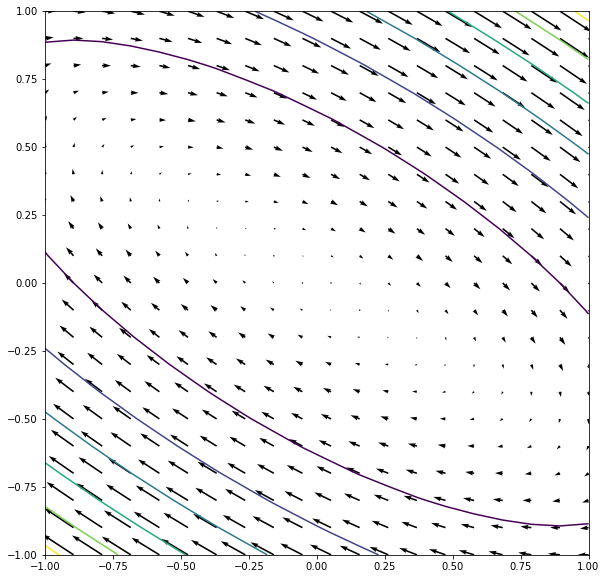

In [5]:
# x and y series
xs = linspace(xm, xp, 20) - (xp + xm)/2
ys = linspace(ym, yp, 21) - (yp + ym)/2

# 2D grid
(x,y) = meshgrid(xs, ys)

z = zp

plt.figure(figsize=(10,10))
plt.quiver(x, y, Bx(x,y), By(x,y))
plt.contour(x, y, psi(x,y))
plt.axis('square')
plt.show()